# Clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes

In [2]:
# Función para obtener clusters mediante K-means #
def kmeans_clustering(data, k):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(data)
    return kmeans

In [3]:
# Función para obtener clusters mediante DBSCAN#
def dbscan_clustering(data, eps):
    return

In [4]:
# Función para visualización de clusters #
def plot_clusters(data, clustering_model, dim_reduction, title=None):
    if dim_reduction == True:
        pca = PCA(n_components=2)
        X_r = pca.fit(data).transform(data)
    
    y = clustering_model.labels_
    target_names = []
    for label in y:
        if label not in target_names:
            target_names.append(label)
    plt.figure(figsize=(20, 10))
    lw = 2
    colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'yellow', 'magenta']

    for color, i, target_name in zip(colors, target_names, target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw, label=target_name)
    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    plt.show()

In [5]:
#Función para obtener el número optimo de clusters utilizando el método del codo#
def elbow_method(data, cluster_number):
    sse = []
    for k in range(1, cluster_number):
        model = kmeans_clustering(data, k)
        sse.append(model.inertia_)
    
    kl = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
    
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, cluster_number), sse)
    plt.xticks(range(1, cluster_number))
    plt.xlabel("Número de clusters")
    plt.ylabel("SSE")
    plt.show()
    
    return kl.elbow

In [6]:
# Función para evaluar los clusters creados mediante silhouette coefficient #
def plot_silhouette_coefficient(data, cluster_number):
    silhouette_coefficients = []
    for k in range(2,cluster_number):
        model = kmeans_clustering(data, k)
        score = silhouette_score(data, model.labels_)
        silhouette_coefficients.append(score)
    
    plt.style.use("fivethirtyeight")
    plt.plot(range(2, cluster_number), silhouette_coefficients)
    plt.xticks(range(2, cluster_number))
    plt.xlabel("Numero de clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()

In [7]:
#Función para obtener el valor de silhouette coefficient de un modelo #
def silhouette_coefficient(data, clustering_model):
    return silhouette_score(data, clustering_model.labels_).round(4)

### Lectura de dataset y extracción de características

In [8]:
FILE_PATH = "../Data/numerical.csv"
df = pd.read_csv(FILE_PATH, encoding='utf-8', error_bad_lines=False)
# Elimina renglones con algún valor NULL #
df = df.dropna()
# Reset a los valores del index en el dataframe #
df = df.reset_index(drop=True)
df

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2.000,170.0,False,Li-Ion,3400.0,4,1.30,13.0,2.0,32.0
1,Acer,Liquid Z6 Plus,Android,3.000,250.0,True,Li-Po,4080.0,8,1.30,13.0,5.0,32.0
2,Acer,Liquid Z6,Android,1.000,120.0,True,Li-Ion,2000.0,4,1.25,8.0,2.0,8.0
3,Acer,Liquid X2,Android,3.000,230.0,True,Li-Po,4020.0,8,1.30,13.0,13.0,32.0
4,Acer,Liquid Zest Plus,Android,2.000,200.0,False,Li-Ion,5000.0,4,1.30,13.0,5.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,ZTE,Grand X LTE T82,Android,1.000,340.0,True,Li-Ion,1900.0,2,1.50,8.0,1.3,4.0
1877,ZTE,Grand X V970,Android,1.000,230.0,True,Li-Ion,1600.0,1,1.00,5.0,0.6,4.0
1878,ZTE,Optik,Android,1.000,230.0,False,Li-Ion,4000.0,2,1.20,5.0,2.0,16.0
1879,ZTE,Light Tab 2 V9A,Android,0.512,250.0,False,Li-Ion,3400.0,1,1.40,3.2,0.6,4.0


In [9]:
os = [os for os in df['OS']]
unique_os = []
for element in os:
    if element not in unique_os:
        unique_os.append(element)
unique_os

['Android', 'Windows', 'iOS', 'BlackBerry']

In [10]:
brand = [brand for brand in df['brand']]
unique_brand = []
for element in brand:
    if element not in unique_brand:
        unique_brand.append(element)

unique_brand

['Acer',
 'alcatel',
 'Allview',
 'Amazon',
 'Apple',
 'Archos',
 'Asus',
 'BenQ',
 'BlackBerry',
 'BLU',
 'BQ',
 'Casio',
 'Cat',
 'Celkon',
 'Coolpad',
 'Dell',
 'Gigabyte',
 'Gionee',
 'Google',
 'HP',
 'HTC',
 'Huawei',
 'Intex',
 'Karbonn',
 'Kyocera',
 'Lava',
 'LeEco',
 'Lenovo',
 'LG',
 'Meizu',
 'Micromax',
 'Microsoft',
 'Motorola',
 'NEC',
 'Nokia',
 'Nvidia',
 'OnePlus',
 'Oppo',
 'Panasonic',
 'Pantech',
 'Prestigio',
 'QMobile',
 'Samsung',
 'Sharp',
 'Sonim',
 'Sony',
 'Sony Ericsson',
 'Spice',
 'T-Mobile',
 'Vertu',
 'verykool',
 'vivo',
 'Vodafone',
 'Wiko',
 'Xiaomi',
 'XOLO',
 'Yezz',
 'Yota',
 'YU',
 'ZTE']

In [11]:
df = df.replace(to_replace='Li-ion', value='Li-Ion')

In [12]:
df['battery_type'].value_counts()

Li-Ion    1382
Li-Po      499
Name: battery_type, dtype: int64

In [13]:
# Codificación de variables categoricas #
columns = ['brand', 'OS', 'battery_removable', 'battery_type']
encoder = preprocessing.LabelEncoder()
df_encoded = df[columns].apply(encoder.fit_transform)
df = df.drop(columns, axis=1)
df = df.join(df_encoded)
#df.drop(df[df['internal_memory_gb'] == '16GB'].index, inplace = True)
df

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb,brand,OS,battery_removable,battery_type
0,Iconia Talk S,2.000,170.0,3400.0,4,1.30,13.0,2.0,32.0,0,0,0,0
1,Liquid Z6 Plus,3.000,250.0,4080.0,8,1.30,13.0,5.0,32.0,0,0,1,1
2,Liquid Z6,1.000,120.0,2000.0,4,1.25,8.0,2.0,8.0,0,0,1,0
3,Liquid X2,3.000,230.0,4020.0,8,1.30,13.0,13.0,32.0,0,0,1,1
4,Liquid Zest Plus,2.000,200.0,5000.0,4,1.30,13.0,5.0,16.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Grand X LTE T82,1.000,340.0,1900.0,2,1.50,8.0,1.3,4.0,56,0,1,0
1877,Grand X V970,1.000,230.0,1600.0,1,1.00,5.0,0.6,4.0,56,0,1,0
1878,Optik,1.000,230.0,4000.0,2,1.20,5.0,2.0,16.0,56,0,0,0
1879,Light Tab 2 V9A,0.512,250.0,3400.0,1,1.40,3.2,0.6,4.0,56,0,0,0


In [14]:
df['RAM'].value_counts()

1.000    749
2.000    404
0.512    308
3.000    206
4.000    102
1.500     53
0.768     31
6.000     11
0.256      8
0.384      4
0.128      1
0.592      1
0.640      1
0.478      1
0.576      1
Name: RAM, dtype: int64

#### Variables categoricas

In [15]:
df['battery_type'].value_counts()

0    1382
1     499
Name: battery_type, dtype: int64

In [16]:
df['OS'].value_counts()

0    1756
2      85
3      27
1      13
Name: OS, dtype: int64

In [17]:
df['brand'].value_counts()

41    258
24    137
19    125
27    122
20    110
44     88
56     85
31     84
29     70
6      56
5      55
1      54
0      53
51     48
36     45
57     44
16     42
33     39
52     33
39     32
3      27
25     22
30     21
59     19
9      17
15     17
37     16
13     16
49     13
28     13
4      12
53      8
47      8
40      8
7       7
11      6
38      6
42      6
22      6
14      5
46      5
26      5
35      5
50      4
8       4
23      3
48      3
58      3
17      3
43      2
55      2
54      1
2       1
18      1
34      1
10      1
12      1
45      1
21      1
32      1
Name: brand, dtype: int64

In [18]:
features = ['RAM','approx_price_EUR', 'battery_mah', 'CPU_cores', 'CPU_speed',
            'internal_memory_gb', 'brand', 'OS', 'battery_removable','battery_type', 'primary_camera_mp', 'secondary_camera_mp']

In [19]:
x = df[features]

### Experimento 1. Clustering sin normalización de datos

In [20]:
kmeans = kmeans_clustering(x, k=8)

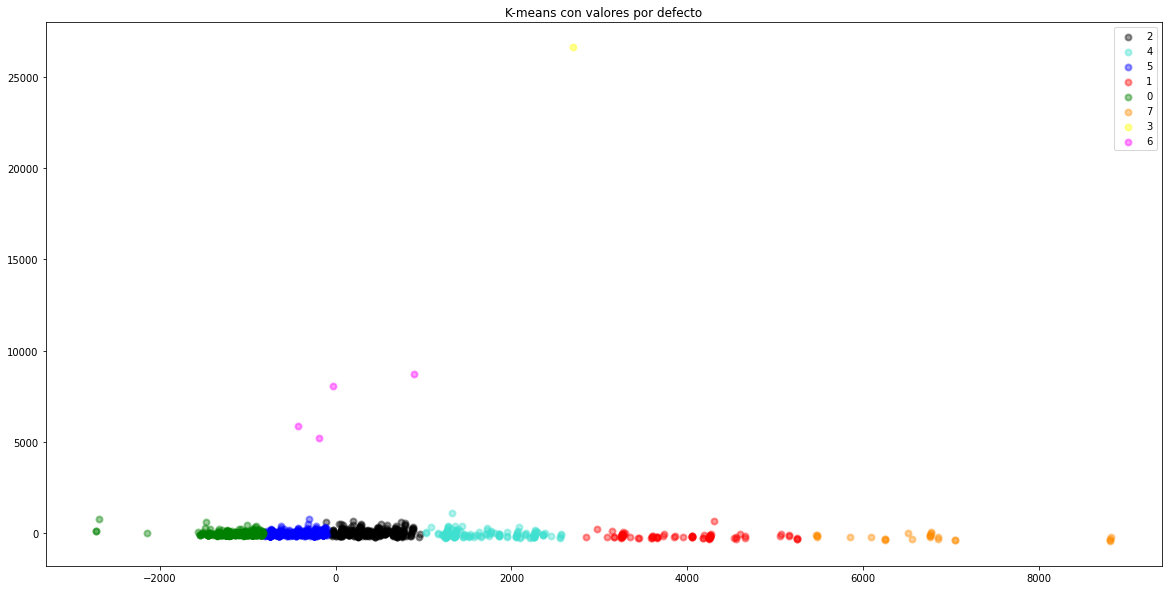

In [21]:
plot_clusters(data=x, clustering_model=kmeans, dim_reduction=True, title="K-means con valores por defecto")

In [22]:
silhouette_coefficient(data=x, clustering_model=kmeans)

0.5171

#### Búsqueda del número de clusters óptimo

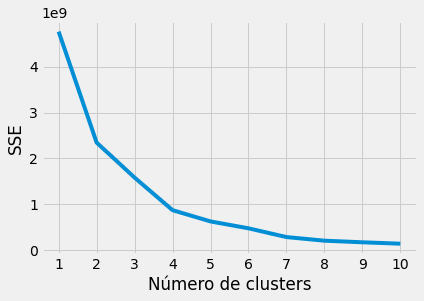

In [23]:
elbow = elbow_method(data=x, cluster_number=11)

In [24]:
optimal_model = kmeans_clustering(data=x, k=elbow)

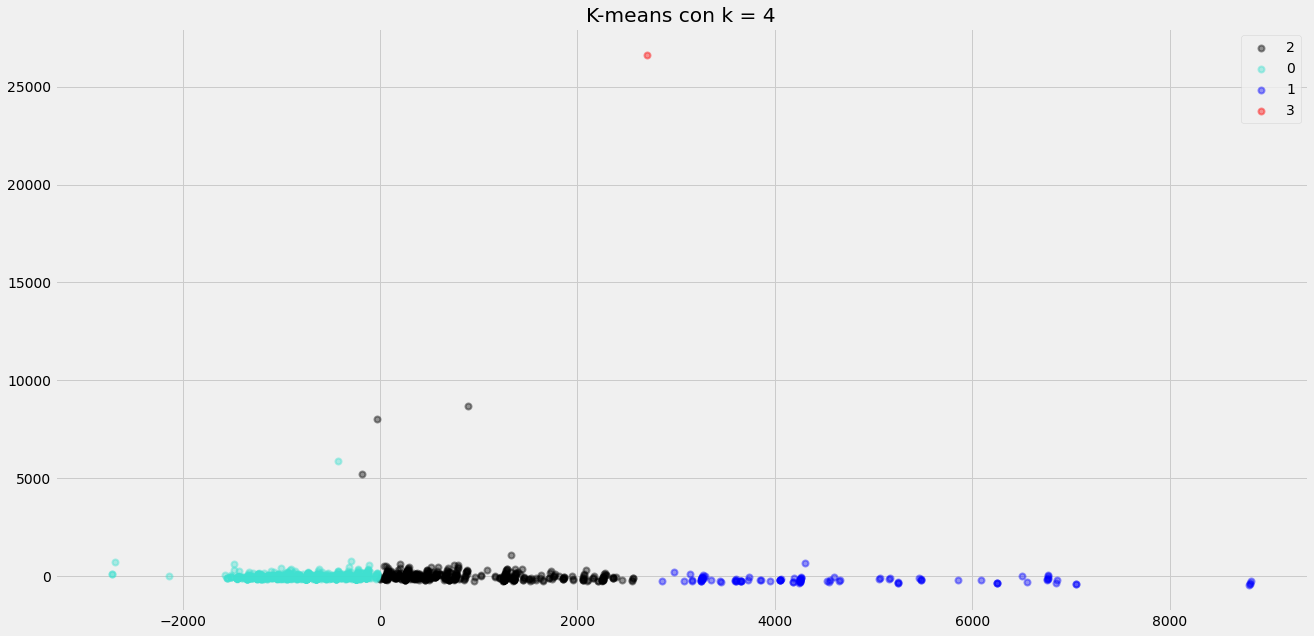

In [25]:
plot_clusters(data=x, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

#### Evaluación de los clusters creados

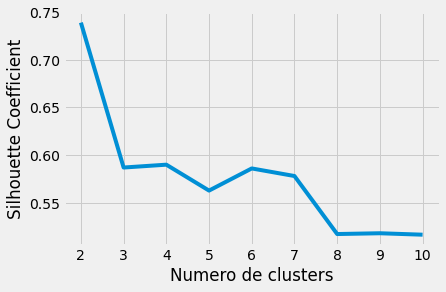

In [26]:
plot_silhouette_coefficient(data=x, cluster_number=11)

In [27]:
silhouette_coefficient(data=x, clustering_model=optimal_model)

0.5899

### Experimento 2. Normalización con StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
x_scaled = scaler.fit_transform(x)

In [30]:
kmeans = kmeans_clustering(x_scaled, k=8)

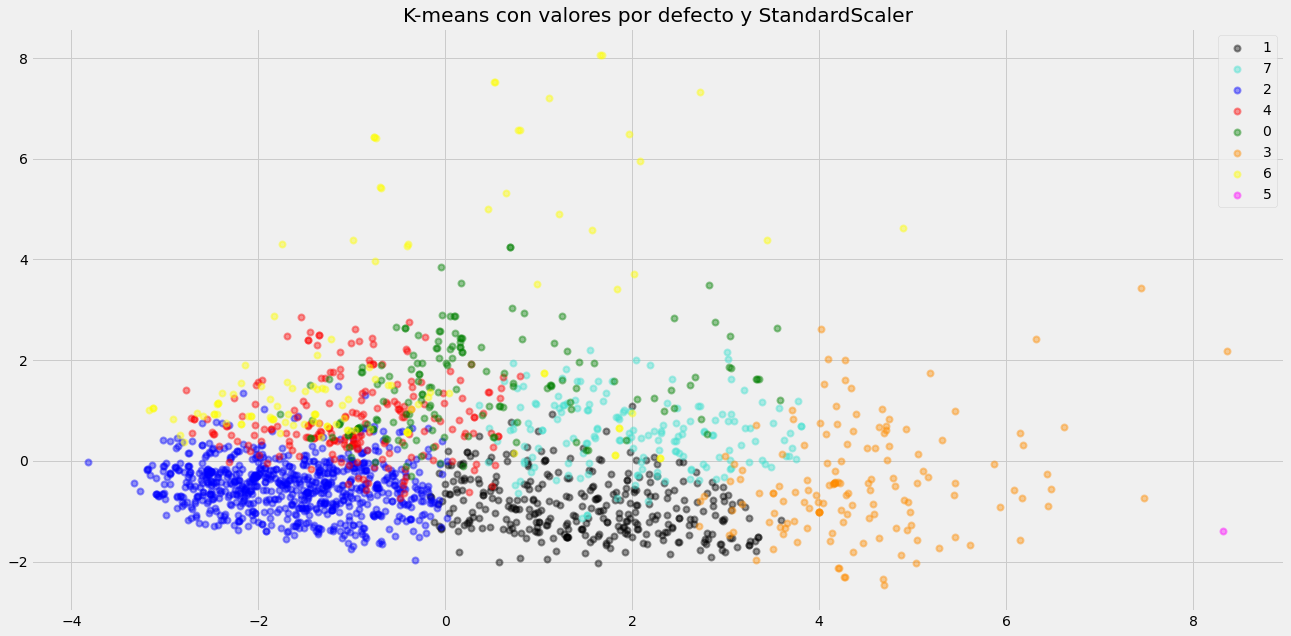

In [31]:
plot_clusters(data=x_scaled, clustering_model=kmeans, dim_reduction=True, title="K-means con valores por defecto y StandardScaler")

In [32]:
silhouette_coefficient(data=x_scaled, clustering_model=kmeans)

0.2284

#### Búsqueda de número de clusters óptimo

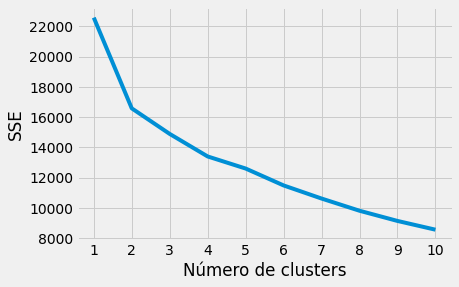

In [33]:
elbow = elbow_method(data=x_scaled, cluster_number=11)

In [34]:
optimal_model = kmeans_clustering(data=x_scaled, k=elbow)

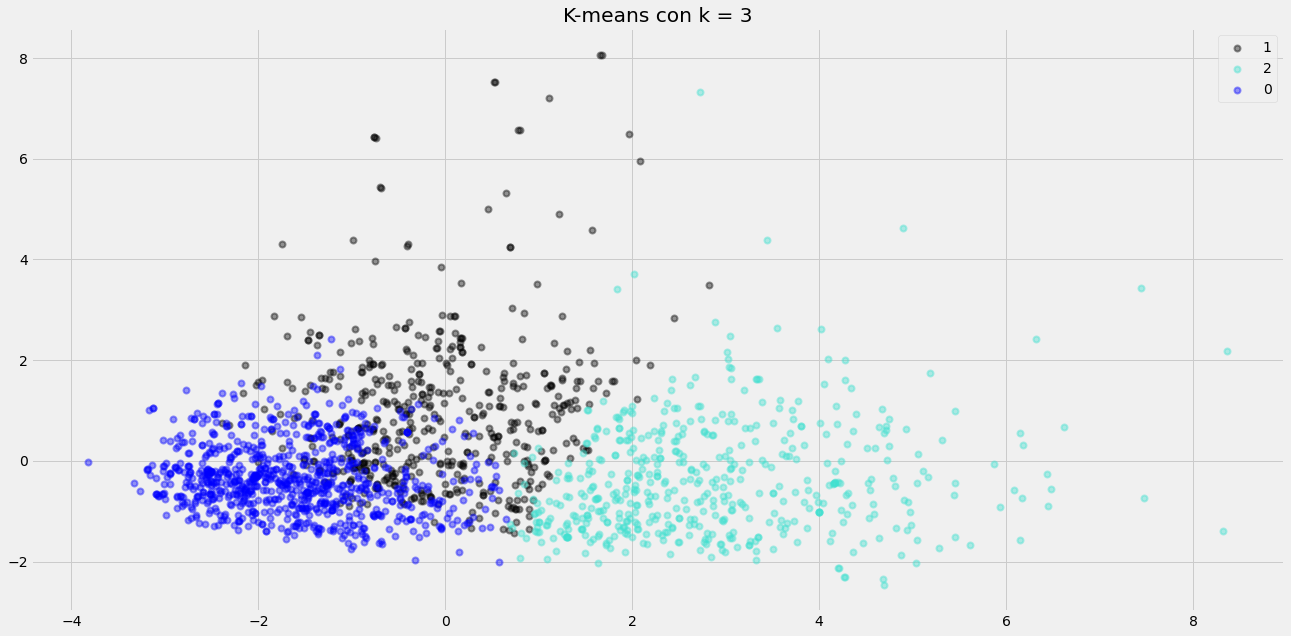

In [35]:
plot_clusters(data=x_scaled, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

#### Evaluación de clusters creados

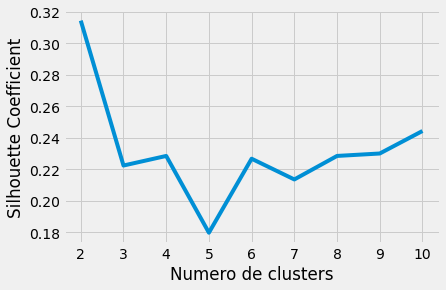

In [36]:
plot_silhouette_coefficient(data=x_scaled, cluster_number=11)

In [37]:
silhouette_coefficient(data=x_scaled, clustering_model=optimal_model)

0.2223

### Experimento 3. Normalización con MinMax Scaler

In [38]:
minmaxScaler = MinMaxScaler()

In [39]:
x_minmaxscaled = minmaxScaler.fit_transform(x)

In [40]:
kmeans = kmeans_clustering(x_minmaxscaled, k=8)

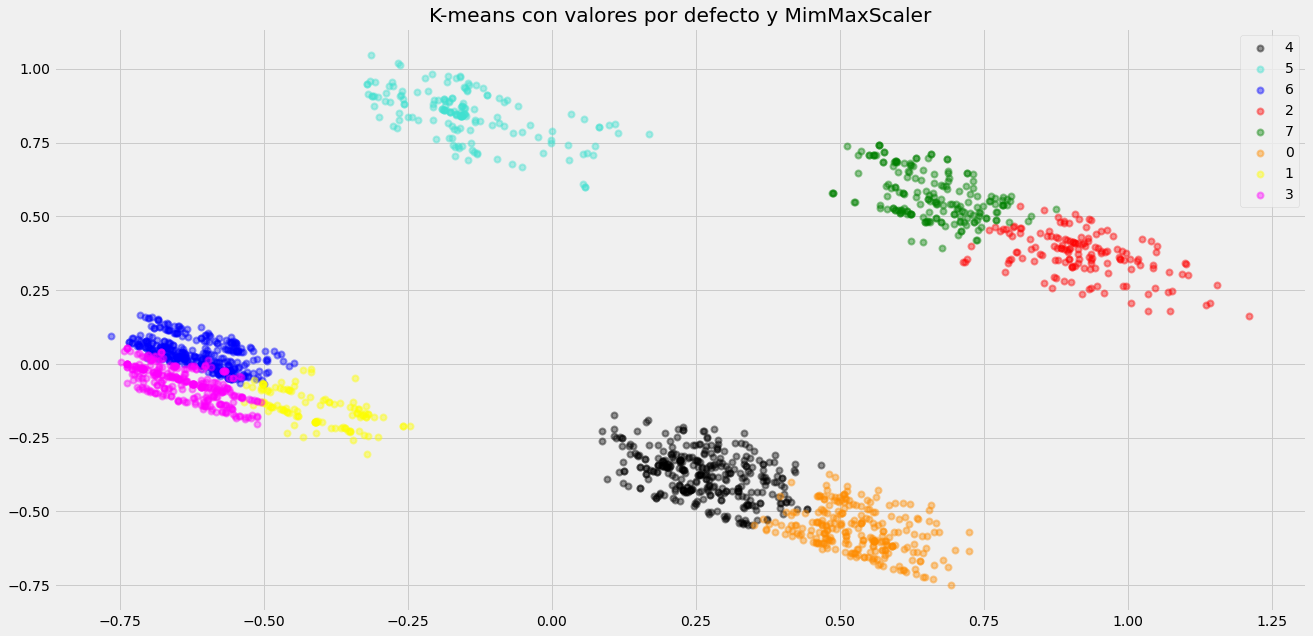

In [41]:
plot_clusters(data=x_minmaxscaled, clustering_model=kmeans, dim_reduction=True, title="K-means con valores por defecto y MimMaxScaler")

In [42]:
silhouette_coefficient(data=x_minmaxscaled, clustering_model=kmeans)

0.3205

#### Búsqueda del número de clusters óptimo

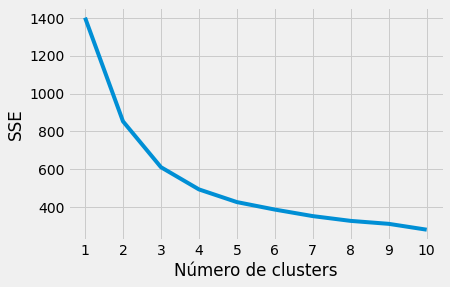

In [43]:
elbow = elbow_method(data=x_minmaxscaled, cluster_number=11)

In [44]:
optimal_model = kmeans_clustering(data=x_minmaxscaled, k=4)

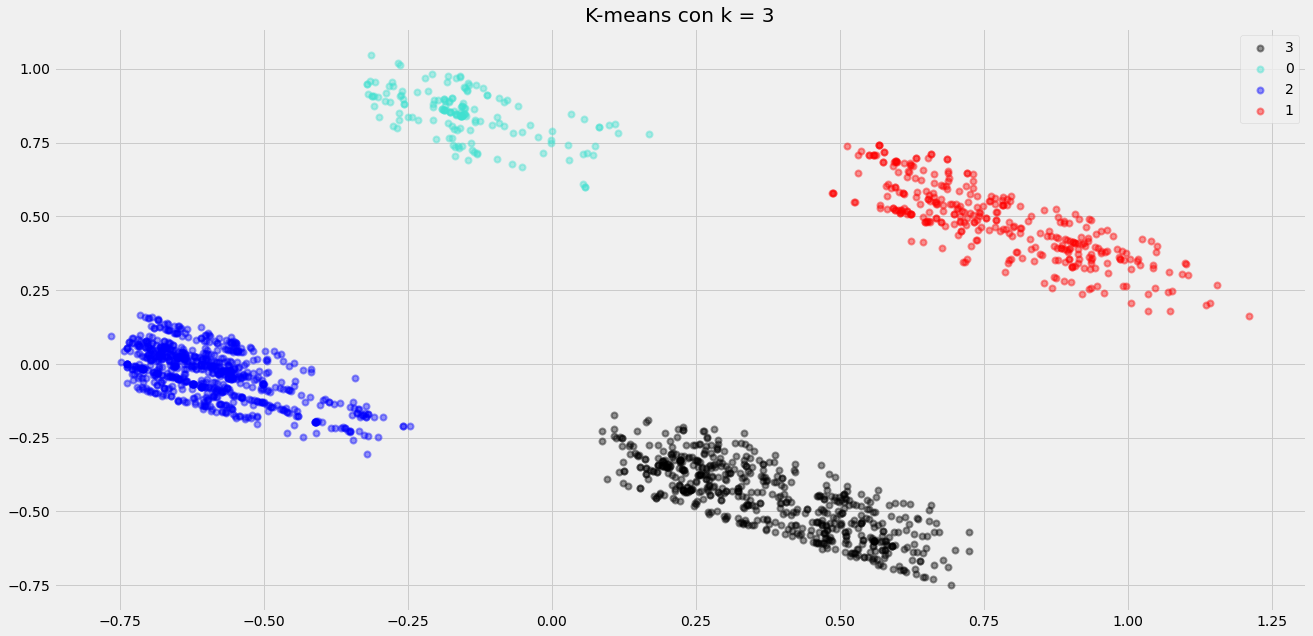

In [45]:
plot_clusters(data=x_minmaxscaled, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

#### Evaluación de clusters creados

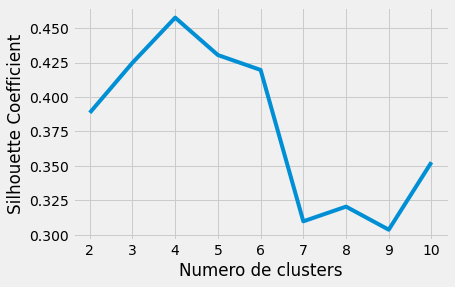

In [46]:
plot_silhouette_coefficient(data=x_minmaxscaled, cluster_number=11)

In [47]:
silhouette_coefficient(data=x_minmaxscaled, clustering_model=optimal_model)

0.4576

## Experimentos sin variables categoricas

In [48]:
features = ['RAM','approx_price_EUR', 'battery_mah', 'CPU_cores', 'CPU_speed',
            'internal_memory_gb','primary_camera_mp', 'secondary_camera_mp']

In [49]:
x = df[features]

### Experimento 4. Clustering sin normalización de datos

In [50]:
kmeans = kmeans_clustering(x, k=8)

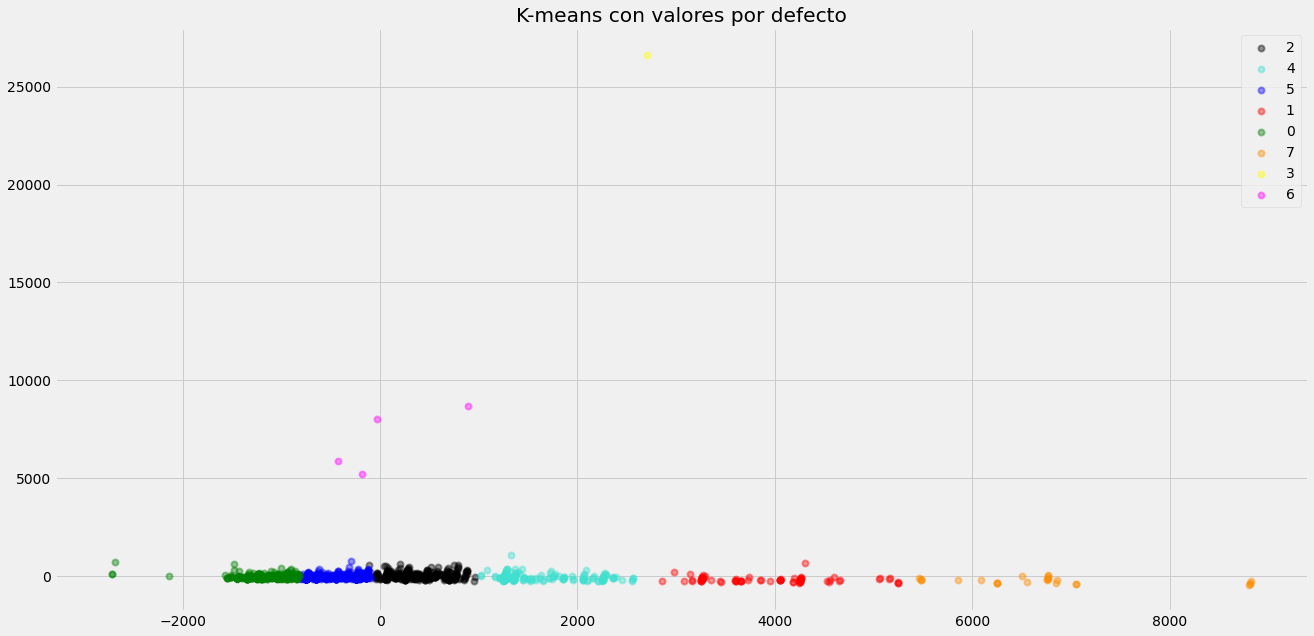

In [51]:
plot_clusters(data=x, clustering_model=kmeans, dim_reduction=True, title="K-means con valores por defecto")

In [52]:
silhouette_coefficient(data=x, clustering_model=kmeans)

0.5189

#### Búsqueda de número de clusters óptimo

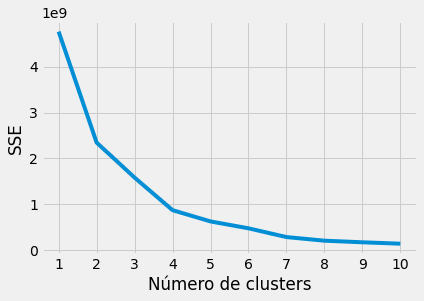

In [53]:
elbow = elbow_method(data=x, cluster_number=11)

In [54]:
optimal_model = kmeans_clustering(data=x, k=elbow)

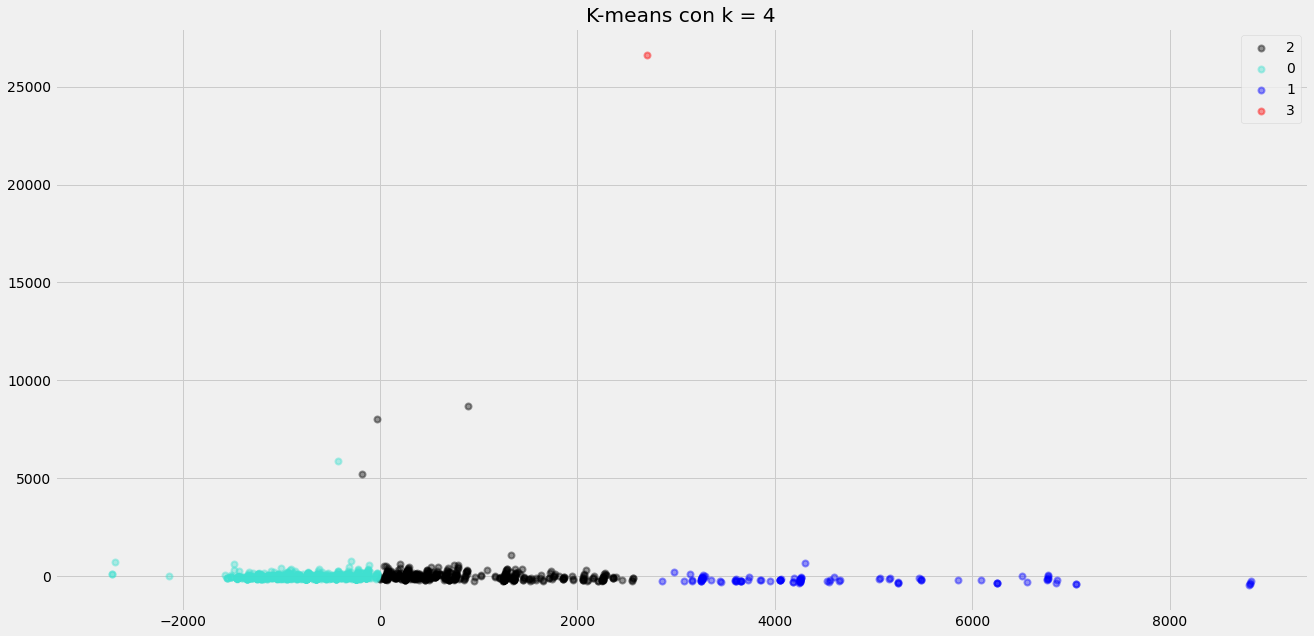

In [55]:
plot_clusters(data=x, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

#### Evaluación de clusters creados

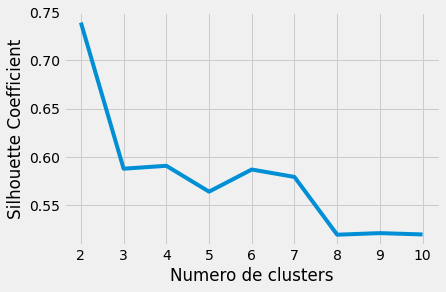

In [56]:
plot_silhouette_coefficient(data=x, cluster_number=11)

In [57]:
silhouette_coefficient(data=x, clustering_model=optimal_model)

0.5905

### Experimento 5. Normalización con StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
x_scaled = scaler.fit_transform(x)

In [60]:
kmeans = kmeans_clustering(x_scaled, k=8)

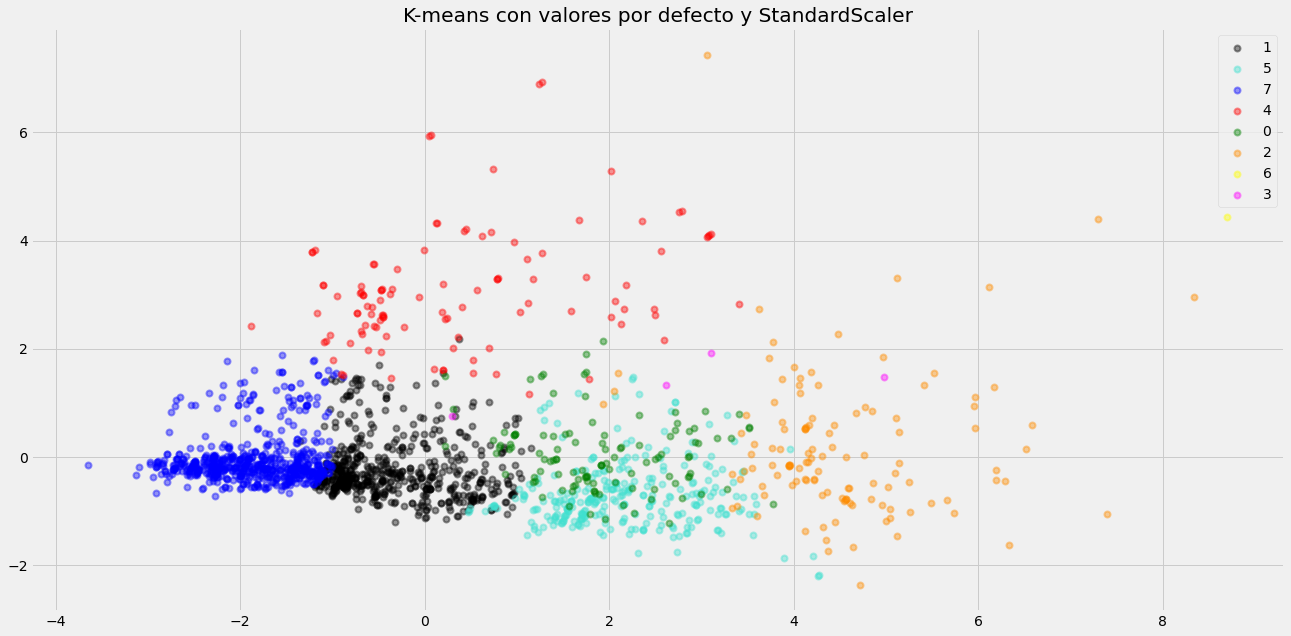

In [61]:
plot_clusters(data=x_scaled, clustering_model=kmeans, dim_reduction=True, title="K-means con valores por defecto y StandardScaler")

In [62]:
silhouette_coefficient(data=x_scaled, clustering_model=kmeans)

0.2651

#### Búsqueda del número óptimo de clusters

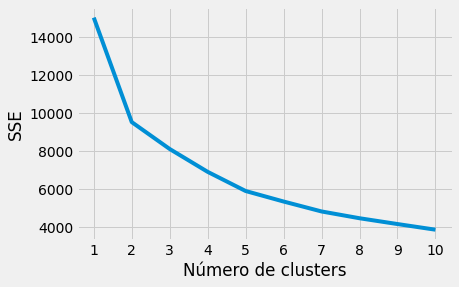

In [63]:
elbow = elbow_method(data=x_scaled, cluster_number=11)

In [64]:
optimal_model = kmeans_clustering(data=x_scaled, k=elbow)

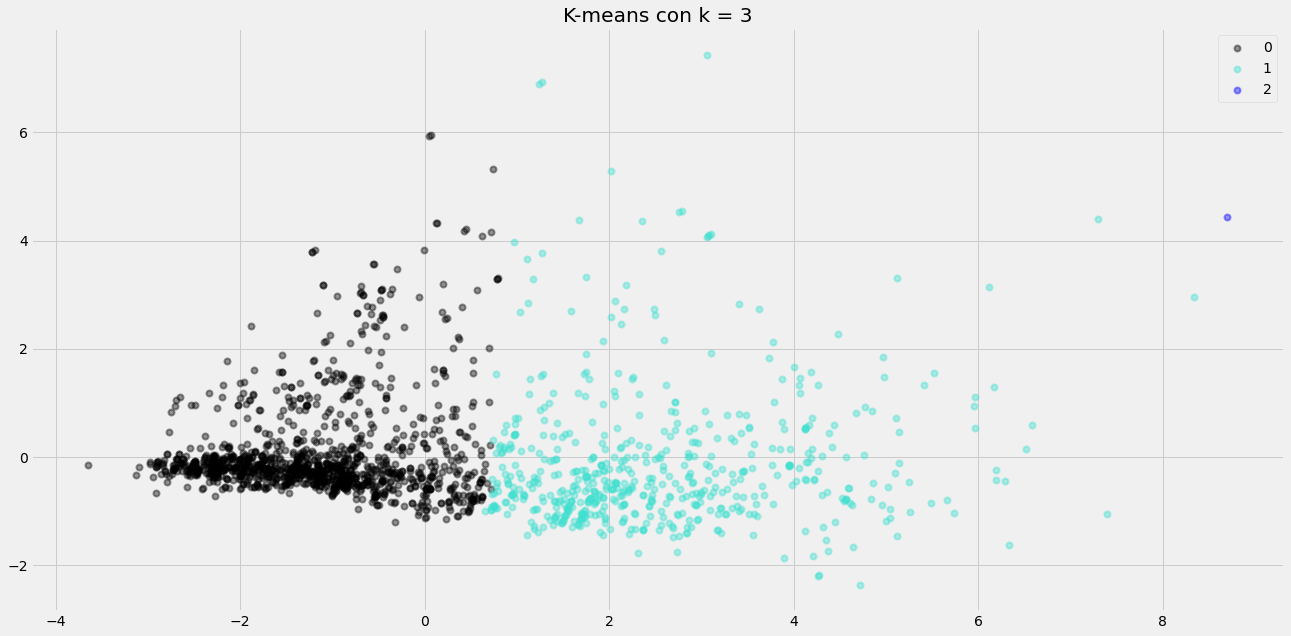

In [65]:
plot_clusters(data=x_scaled, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

#### Evaluación de clusters creados

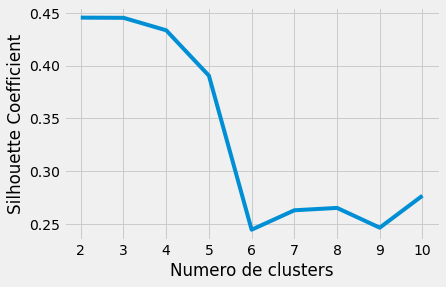

In [66]:
plot_silhouette_coefficient(data=x_scaled, cluster_number=11)

In [67]:
silhouette_coefficient(data=x_scaled, clustering_model=optimal_model)

0.4455

### Experimento 6. Normalización con MinMaxScaler

In [68]:
minmaxScaler = MinMaxScaler()

In [69]:
x_minmaxscaled = minmaxScaler.fit_transform(x)

In [70]:
kmeans = kmeans_clustering(x_minmaxscaled, k=8)

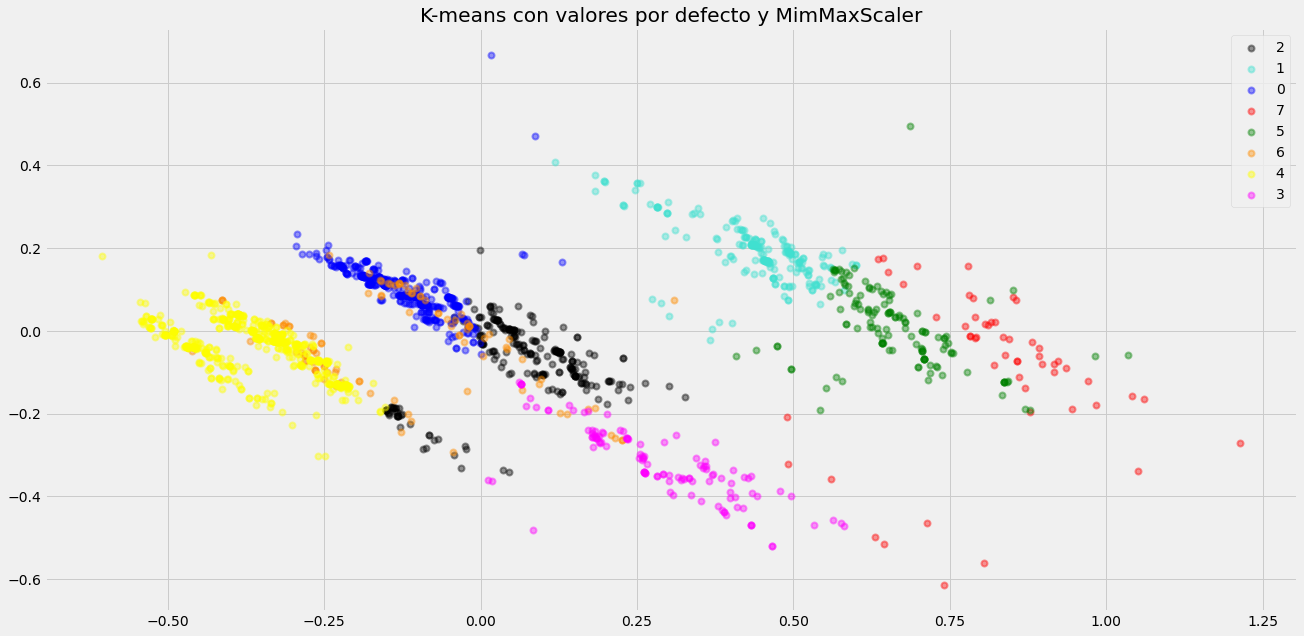

In [71]:
plot_clusters(data=x_minmaxscaled, clustering_model=kmeans, dim_reduction=True, title="K-means con valores por defecto y MimMaxScaler")

In [72]:
silhouette_coefficient(data=x_minmaxscaled, clustering_model=kmeans)

0.3248

#### Búsqueda del número de clusters óptimo

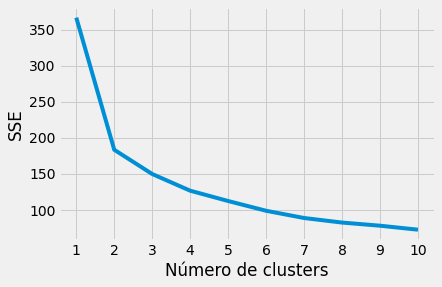

In [73]:
elbow = elbow_method(data=x_minmaxscaled, cluster_number=11)

In [74]:
optimal_model = kmeans_clustering(data=x_minmaxscaled, k=elbow)

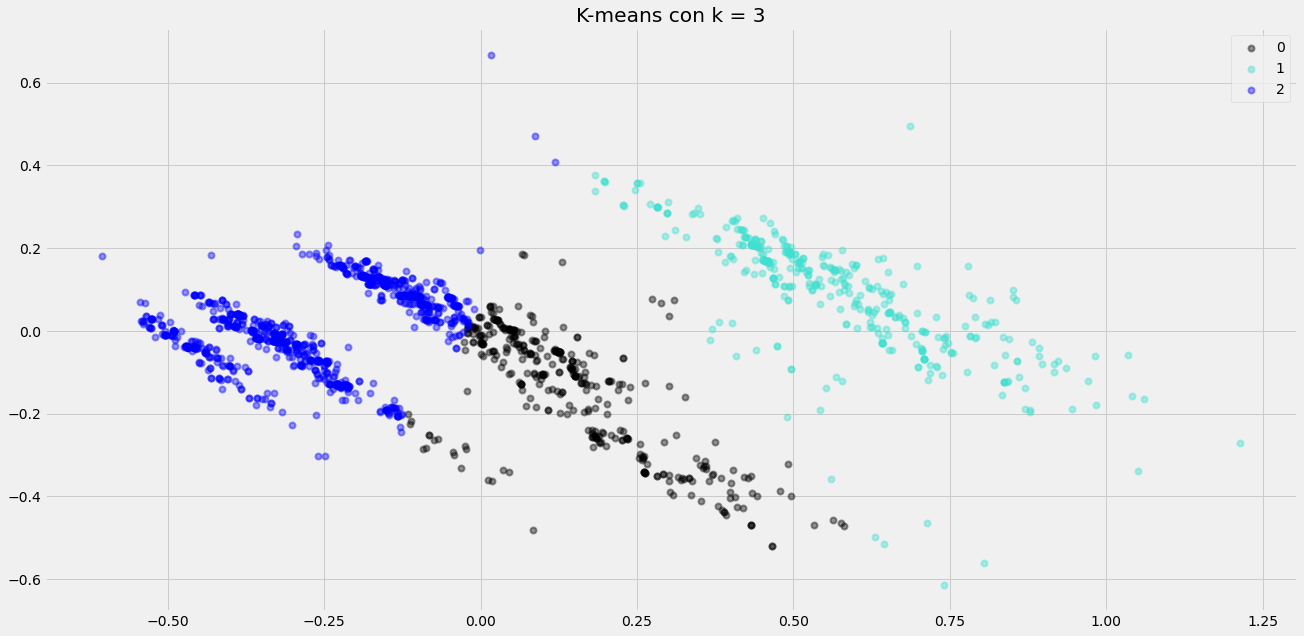

In [75]:
plot_clusters(data=x_minmaxscaled, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

#### Evaluación de clusters creados

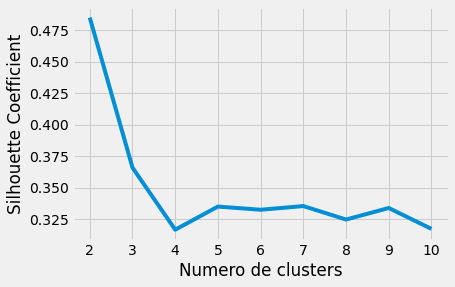

In [76]:
plot_silhouette_coefficient(data=x_minmaxscaled, cluster_number=11)

In [77]:
silhouette_coefficient(data=x_minmaxscaled, clustering_model=optimal_model)

0.366

## One-hot encoding en variables categoricas

In [78]:
def rename_one_hot_encoding_column(df, base_feature):
    for column in df.columns:
        df.rename(columns={column:'{}_{}'.format(base_feature,column)}, inplace=True)
    return df

In [79]:
#batteryType_ohe = pd.get_dummies(df['battery_type'], drop_first=True)
#batteryType_ohe = rename_one_hot_encoding_column(df=batteryType_ohe, base_feature='battery_type')

In [80]:
brand_ohe = pd.get_dummies(df['brand'])
brand_ohe = rename_one_hot_encoding_column(df=brand_ohe, base_feature='brand')

In [81]:
os_ohe = pd.get_dummies(df['OS'])
os_ohe = rename_one_hot_encoding_column(df=os_ohe, base_feature='OS')
os_ohe

,OS_0,OS_1,OS_2,OS_3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1876,1,0,0,0
1877,1,0,0,0
1878,1,0,0,0
1879,1,0,0,0


In [82]:
#df = df.join(batteryType_ohe)
df = df.join(brand_ohe)
df = df.join(os_ohe)

In [83]:
#df = df.drop(['battery_type', 'brand', 'OS'], axis=1)
df = df.drop(['brand', 'OS'], axis=1)

In [84]:
df

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb,battery_removable,...,brand_54,brand_55,brand_56,brand_57,brand_58,brand_59,OS_0,OS_1,OS_2,OS_3
0,Iconia Talk S,2.000,170.0,3400.0,4,1.30,13.0,2.0,32.0,0,...,0,0,0,0,0,0,1,0,0,0
1,Liquid Z6 Plus,3.000,250.0,4080.0,8,1.30,13.0,5.0,32.0,1,...,0,0,0,0,0,0,1,0,0,0
2,Liquid Z6,1.000,120.0,2000.0,4,1.25,8.0,2.0,8.0,1,...,0,0,0,0,0,0,1,0,0,0
3,Liquid X2,3.000,230.0,4020.0,8,1.30,13.0,13.0,32.0,1,...,0,0,0,0,0,0,1,0,0,0
4,Liquid Zest Plus,2.000,200.0,5000.0,4,1.30,13.0,5.0,16.0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Grand X LTE T82,1.000,340.0,1900.0,2,1.50,8.0,1.3,4.0,1,...,0,0,1,0,0,0,1,0,0,0
1877,Grand X V970,1.000,230.0,1600.0,1,1.00,5.0,0.6,4.0,1,...,0,0,1,0,0,0,1,0,0,0
1878,Optik,1.000,230.0,4000.0,2,1.20,5.0,2.0,16.0,0,...,0,0,1,0,0,0,1,0,0,0
1879,Light Tab 2 V9A,0.512,250.0,3400.0,1,1.40,3.2,0.6,4.0,0,...,0,0,1,0,0,0,1,0,0,0


In [85]:
features_ohe = [f for f in df.columns if f != 'model']

In [86]:
x = df[features_ohe]

In [87]:
x.columns

Index(['RAM', 'approx_price_EUR', 'battery_mah', 'CPU_cores', 'CPU_speed',
       'primary_camera_mp', 'secondary_camera_mp', 'internal_memory_gb',
       'battery_removable', 'battery_type', 'brand_0', 'brand_1', 'brand_2',
       'brand_3', 'brand_4', 'brand_5', 'brand_6', 'brand_7', 'brand_8',
       'brand_9', 'brand_10', 'brand_11', 'brand_12', 'brand_13', 'brand_14',
       'brand_15', 'brand_16', 'brand_17', 'brand_18', 'brand_19', 'brand_20',
       'brand_21', 'brand_22', 'brand_23', 'brand_24', 'brand_25', 'brand_26',
       'brand_27', 'brand_28', 'brand_29', 'brand_30', 'brand_31', 'brand_32',
       'brand_33', 'brand_34', 'brand_35', 'brand_36', 'brand_37', 'brand_38',
       'brand_39', 'brand_40', 'brand_41', 'brand_42', 'brand_43', 'brand_44',
       'brand_45', 'brand_46', 'brand_47', 'brand_48', 'brand_49', 'brand_50',
       'brand_51', 'brand_52', 'brand_53', 'brand_54', 'brand_55', 'brand_56',
       'brand_57', 'brand_58', 'brand_59', 'OS_0', 'OS_1', 'OS_2', 'OS_

### Experimento 7. One-hot encoding sin normalizacion

In [88]:
kmeans = kmeans_clustering(x, k=8)

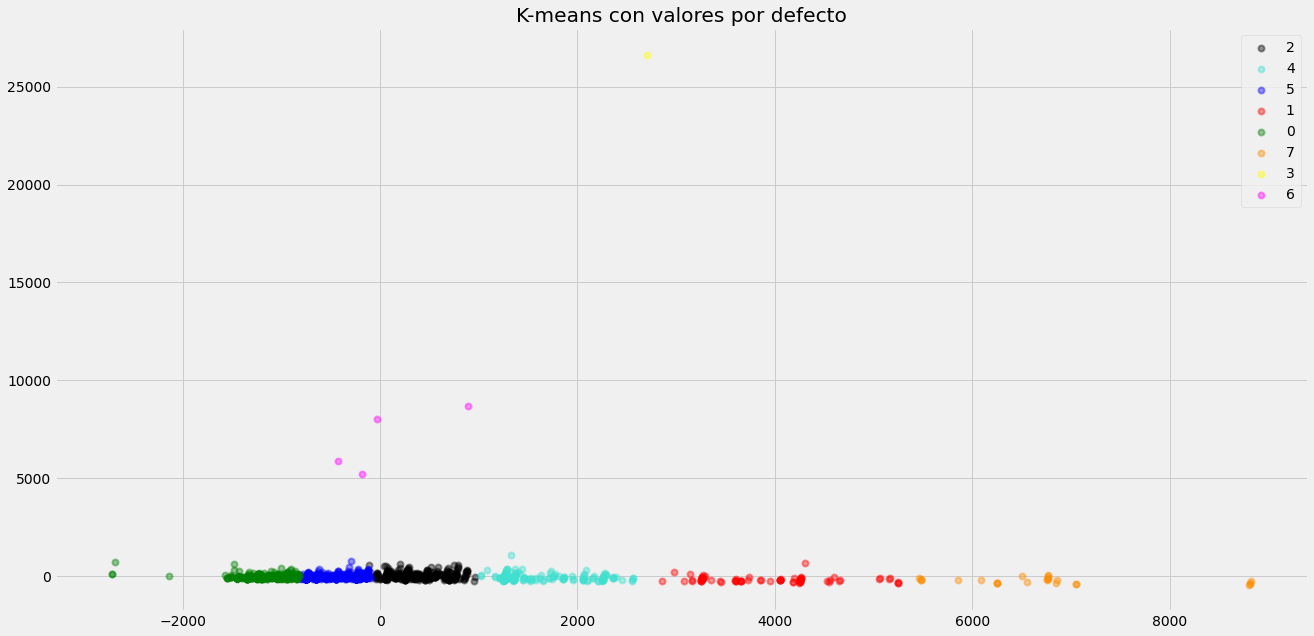

In [89]:
plot_clusters(data=x, clustering_model=kmeans, dim_reduction=True, title="K-means con valores por defecto")

In [90]:
silhouette_coefficient(data=x, clustering_model=kmeans)

0.5189

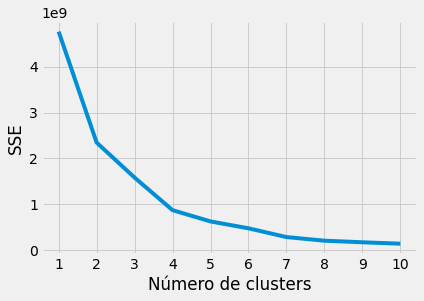

In [91]:
elbow = elbow_method(data=x, cluster_number=11)

In [92]:
optimal_model = kmeans_clustering(data=x, k=elbow)

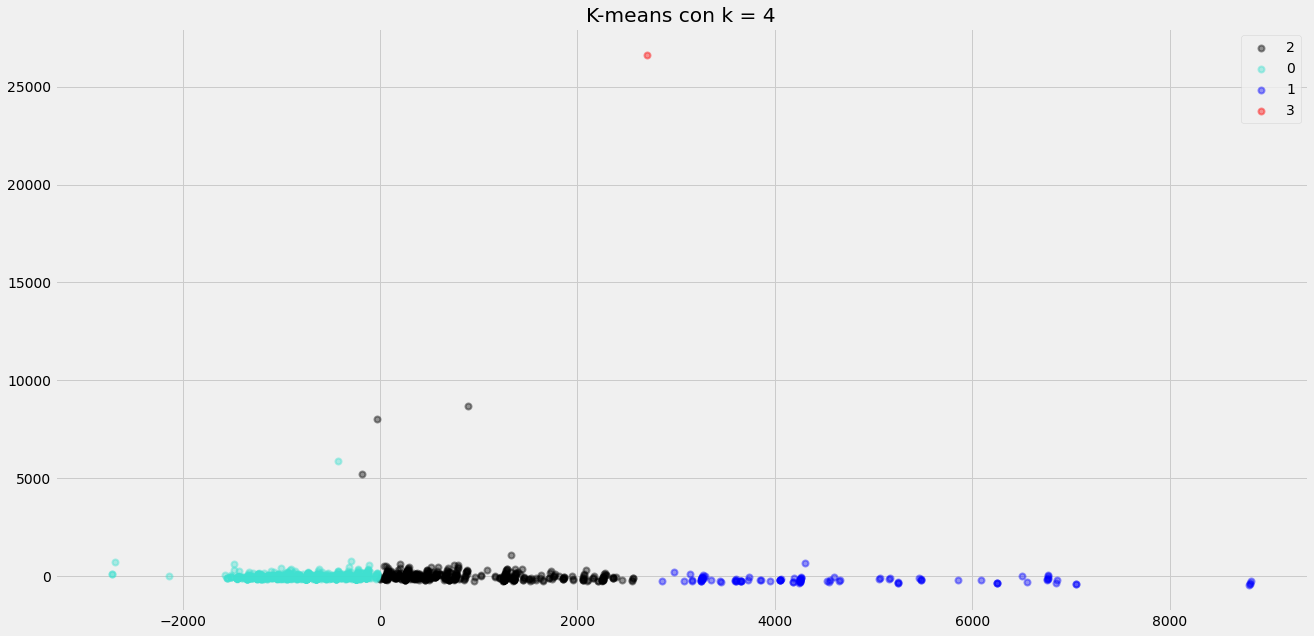

In [93]:
plot_clusters(data=x, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

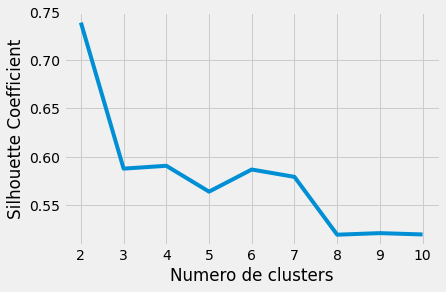

In [94]:
plot_silhouette_coefficient(data=x, cluster_number=11)

In [95]:
silhouette_coefficient(data=x, clustering_model=optimal_model)

0.5905

### MinMaxScaler()

In [102]:
scaler = MinMaxScaler()

In [103]:
x_scaled = scaler.fit_transform(x)

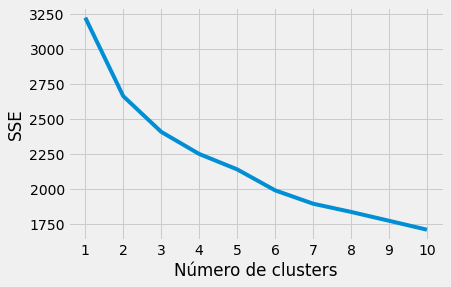

In [104]:
elbow = elbow_method(data=x_scaled, cluster_number=11)

In [105]:
optimal_model = kmeans_clustering(data=x_scaled, k=elbow)

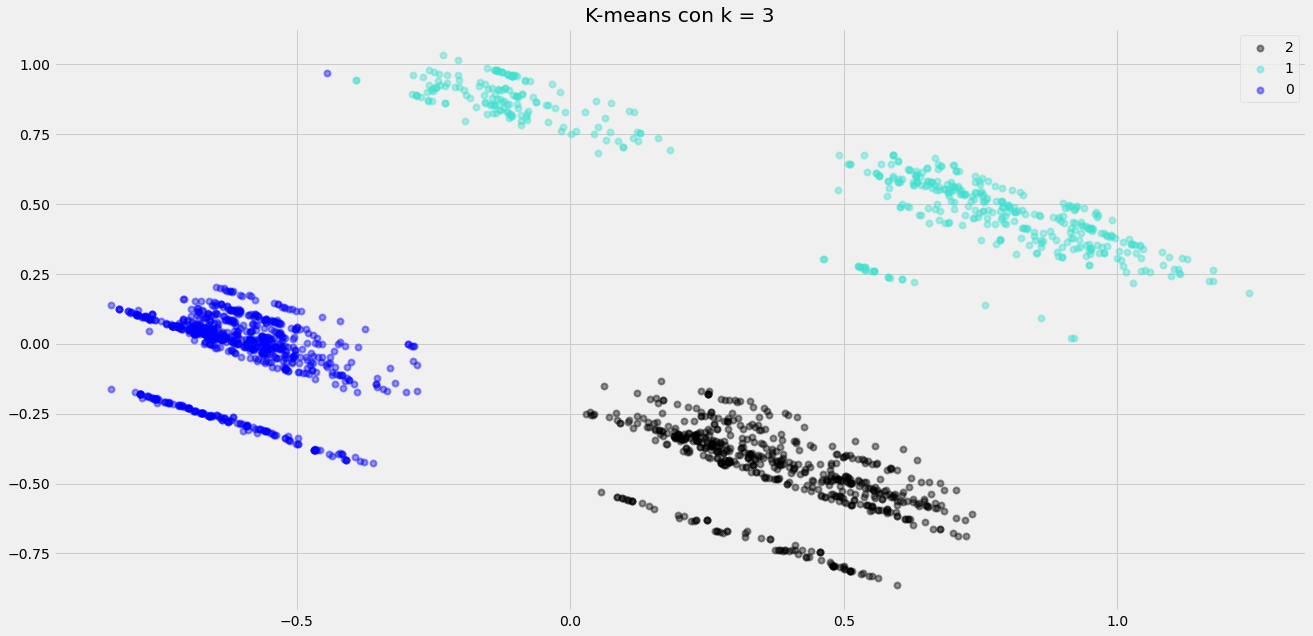

In [106]:
plot_clusters(data=x_scaled, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

In [107]:
silhouette_coefficient(data=x_scaled, clustering_model=optimal_model)

0.1706

### StandardScaler()

In [108]:
scaler = StandardScaler()

In [109]:
x_scaled = scaler.fit_transform(x)

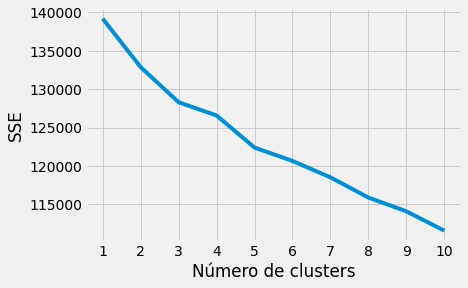

In [110]:
elbow = elbow_method(data=x_scaled, cluster_number=11)

In [111]:
optimal_model = kmeans_clustering(data=x_scaled, k=elbow)

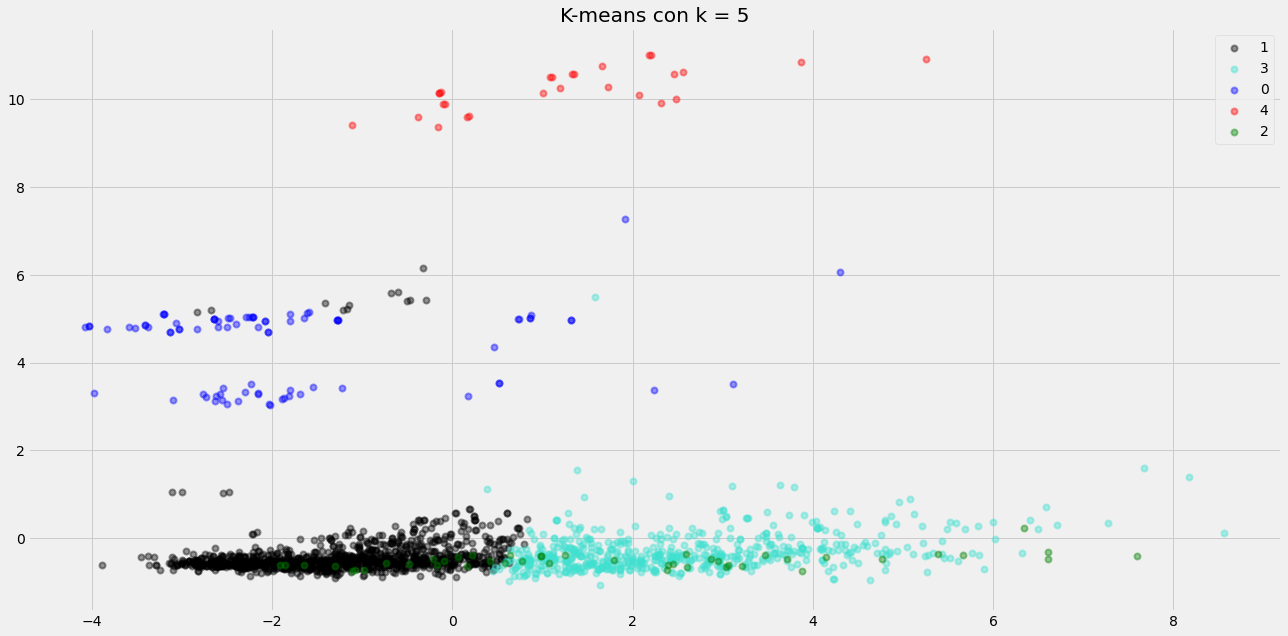

In [112]:
plot_clusters(data=x_scaled, clustering_model=optimal_model, dim_reduction=True, title="K-means con k = {}".format(elbow))

In [113]:
silhouette_coefficient(data=x_scaled, clustering_model=optimal_model)

0.0966